# Alcohol Consumption in Russia

![Alcoholic Beverages in Russia](images/drinks.png)
            Source: [The Russian alcohol market: a heady cocktail](http://www.food-exhibitions.com/Market-Insights/Russia/The-Russian-alcohol-market)

## Project Motivation

A fictitious company owns a chain of stores across Russia that sell a variety of types of alcohol. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful and need help determining which regions they should select.

![Regions in Russia](images/regions.png)
        Source: [Outline of Russia](https://en.wikipedia.org/wiki/Outline_of_Russia)
        
This project aims to use machine learning algorithm to recommend, at least 10 regions with alcohol buying habits similar to Saint Petersburg. 

## The Dataset

The data used in this project is obtained from [Datacamp's Career Hub repository](https://github.com/datacamp/careerhub-data) on GitHub. It contains 7 variables as see in the description below:

![Description of dataset](images/data_description.png)

## Analysis Plan

Based on the ask of the project, the problem is best solved using an unsupervied machine learning algorithm that could best cluster regions based on wine sales in Saint Petersburg. Selection of this algorithm will be done in subsequent sections.

The following steps will be followed:

- Perform Exploratory Data Analysis to identify patters and draw insights from the data.
- Select a suitable unsupervised machine learning algorithm based on problem to solve and information from the exploratory data analysis.
- Discuss model performance.

### Exploratory Data Analysis

This section will explore the data to discover trends and insights. It will be done by creating plots of features against their values. The following steps will be implemented:

- Read data
- Check for data quality issues.
- Clean and transform data into a suitable format for exploration.
- Data Visualization to observe patterns and trends.

In [1]:
# import system and exploratory analysis modules
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy as np; print("Numpy", np.__version__)
import matplotlib
import matplotlib.pyplot as plt; print("Matplotlib", matplotlib.__version__)
import pandas as pd; print("Pandas", pd.__version__)
import seaborn as sns; print("Seaborn", sns.__version__)
import scipy; print("Scipy", scipy.__version__)
import sklearn; print("Scikit -Learn", sklearn.__version__)
import funcs

Windows-10-10.0.19041-SP0
Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
Numpy 1.19.2
Matplotlib 3.3.2
Pandas 1.1.5
Seaborn 0.11.1
Scipy 1.5.2
Scikit -Learn 0.23.2


In [2]:
# set theme for seaborn
sns.set_style('whitegrid')
sns.set(font_scale = 0.8)

### Read and check data for quality issues

A function us created to do the following:
- Read the data
- Drop duplicates
- Create a list of feature names
- Create a containing data types and nulls.

In [3]:
path = 'alcohol-consumption-in-russia.csv'

In [4]:
df, df_cols, df_nulls = funcs.read_data(path)

Making a copy of the dataframe

Data consists of:

...........................

Rows: 1615

Columns: 7

...........................

Extracting count and percentages of nulls and non nulls


In [5]:
# inspect first 5 rows of data
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [6]:
# check for quality issues in data
df_nulls

,Feature,DataType,CountOfNonNulls,CountOfNulls,PercentOfNullsIinColumn,PercentOfNullsInData
0,year,int64,1615,0,0.000000,0.000000
1,region,object,1615,0,0.000000,0.000000
2,wine,float64,1552,63,3.900929,20.257235
3,beer,float64,1557,58,3.591331,18.649518
4,vodka,float64,1554,61,3.777090,19.614148
5,champagne,float64,1552,63,3.900929,20.257235
6,brandy,float64,1549,66,4.086687,21.221865


In [7]:
# summary statistics for numerical features
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


In [8]:
# numerical data
df.describe(exclude = 'number')

,region
count,1615
unique,85
top,Zabaykalsky Krai
freq,19


As can be observed above, the dataset consists of 1615 rows and 7 columns. Region is the only column of type object. Also, we can tell that there are missing values in all the columns containing data of the alcoholic beverages. Noteably, Brandy has the most missing values, about 21.2% of total nulls in data. We will handle missing values in the cleaning and transformation sections. 

The summary statistics gave us an overview of basic statistical properties. We can tell that the data contains sales per capita records from the 2002 to 1998. There are 85 regions covered and Kamchatka Krai is the most frequent among region values.

### Clean and Transform Data

The data is relatively clean based on our observation from inspection section. We will handle missing values by imputing the mean of values in each beverage column and also, strip leading and trailing spaces in region column.

A function is created to perform the cleaning and transformation processes stated above.

In [9]:
# clean and transform data
df_clean = funcs.clean_and_transform(df)

In [10]:
# inspect data again for quality issues
df_clean.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998-01-01,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998-01-01,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998-01-01,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998-01-01,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998-01-01,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


### Visualizations

Visualizing the data will aid in identifying patterns and relationships among the features. For this project, we will create the following plots:
- Time series of sales data.
- Regional Sales.
- Correlation of numerical features.

We will also create a function for some of these plots.

In [11]:
df_grp, df_melt = funcs.group_melt(df_clean, year = 'year', region = 'region')

In [12]:
df_grp_reg, df_melt_reg = funcs.group_melt(df_clean, region = 'region')

In [13]:
df_melt_reg.head()

,region,beverages,Sales per Capita
0,Altai Krai,wine,3.174211
1,Altai Republic,wine,5.190000
2,Amur Oblast,wine,5.221579
3,Arkhangelsk Oblast,wine,8.670000
4,Astrakhan Oblast,wine,4.469474


In [14]:
wine_melt = df_melt_reg.loc[df_melt_reg['beverages'] == 'wine']
wine_melt.head()

,region,beverages,Sales per Capita
0,Altai Krai,wine,3.174211
1,Altai Republic,wine,5.190000
2,Amur Oblast,wine,5.221579
3,Arkhangelsk Oblast,wine,8.670000
4,Astrakhan Oblast,wine,4.469474


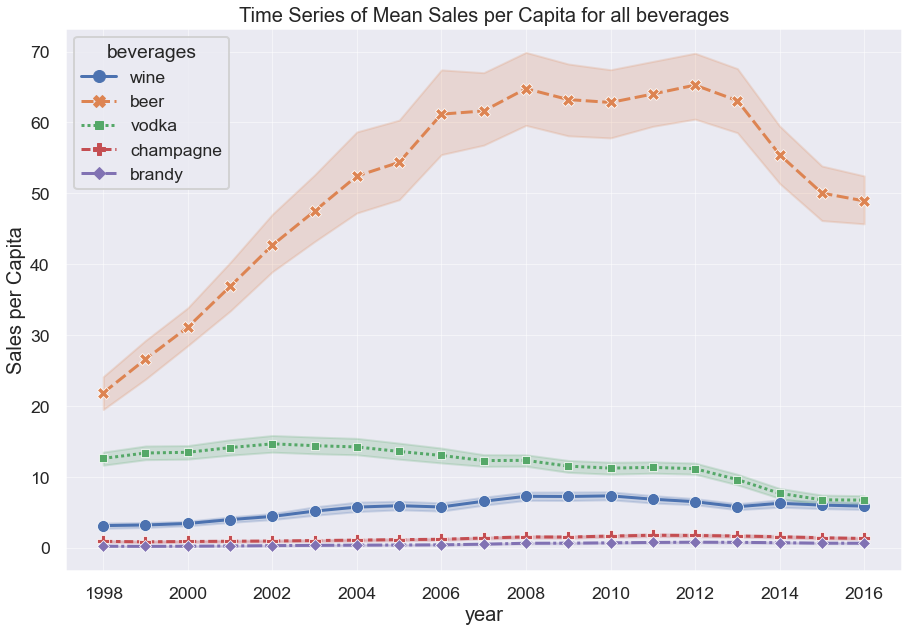

In [25]:
# Time series beverage sales
funcs.plot_timeseries(df_melt, region = 'all regions', beverage = 'all beverages')

The time series plot above indicates that beer had the highest sales over year even though sales decreased from 2012 to 2015. On the other hand, our product of interest, wine, saw a gradual increase in sales starting from 2002. Vodka also experienced gradual drop in sales. There is minimal sales increase for champagne and brandy.

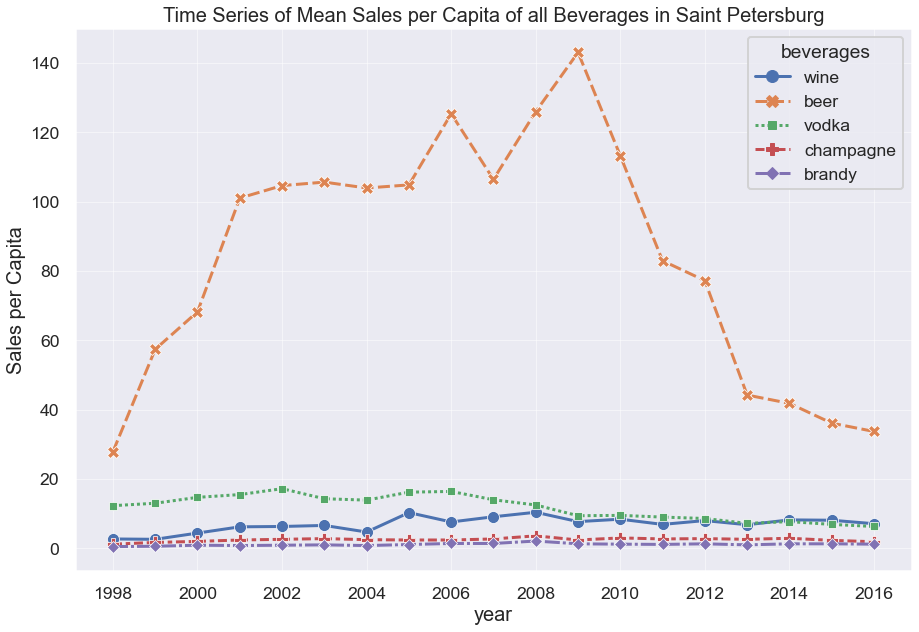

In [16]:
# time series for Saint Petersburg
funcs.plot_timeseries(df_melt, region = 'Saint Petersburg', beverage = 'all beverages')
# funcs.plot_timeseries(df_melt, 'Saint Petersburg', 'wine')
# plot_features(df_clean, 'all regions', 'brandy')

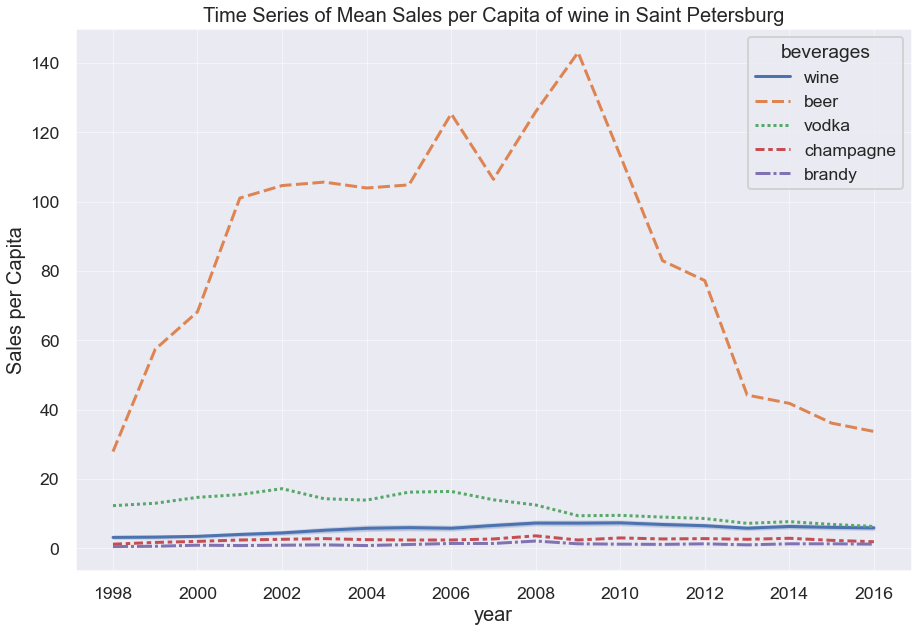

In [17]:
funcs.plot_timeseries(df_melt, region = 'Saint Petersburg', beverage = 'wine')

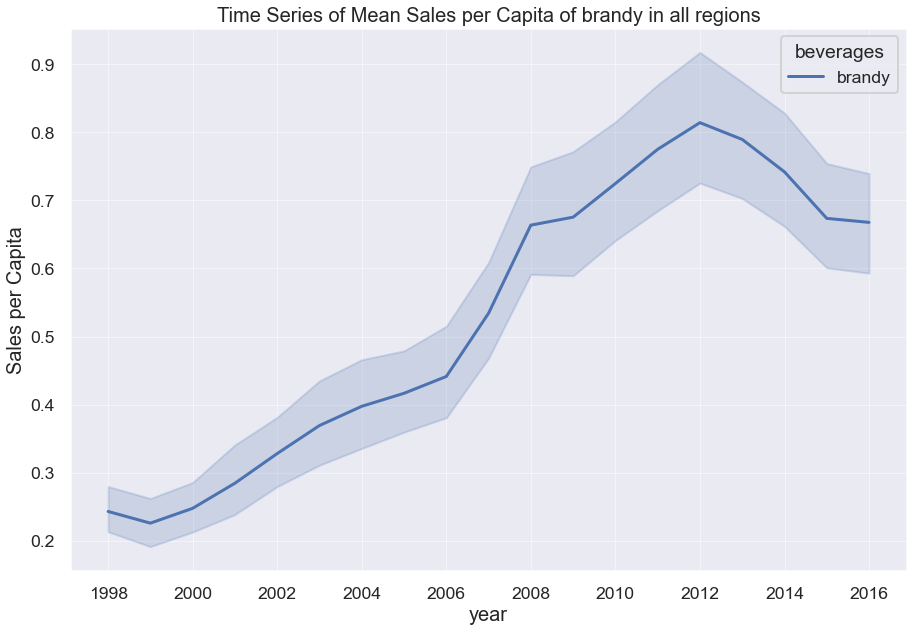

In [18]:
funcs.plot_timeseries(df_melt, region = 'all regions', beverage = 'brandy')

Sales in Saint Petersburg follows same trend as combined regions. Zooming in on wine, we can see a leap between 2004 and 2005 followed by fluctuating sales up to 2015.

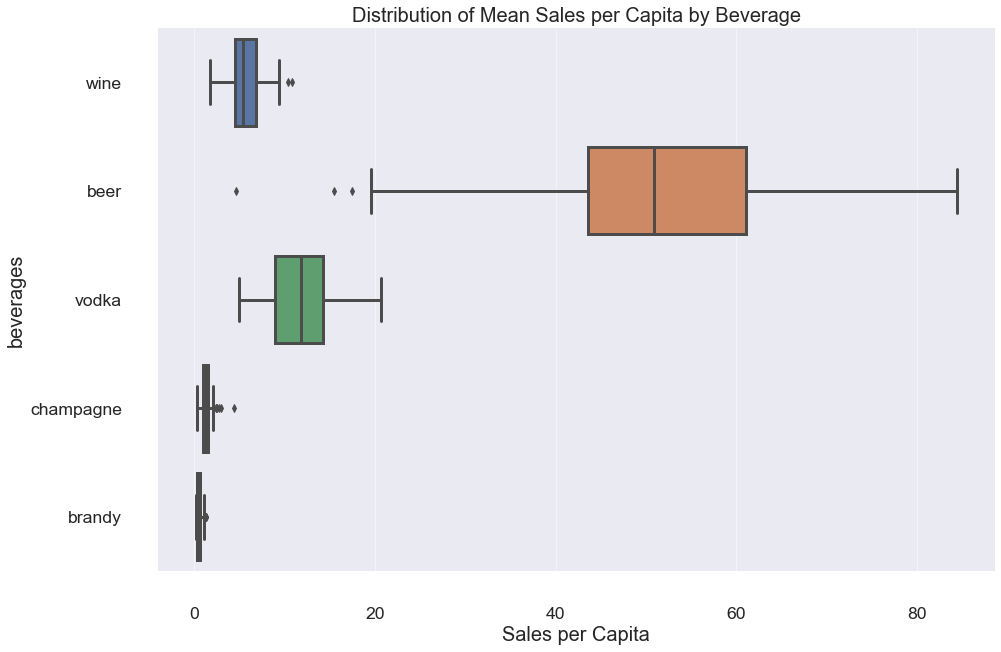

In [19]:
funcs.cat_plots(df_melt_reg, plot_type = 'boxplot')

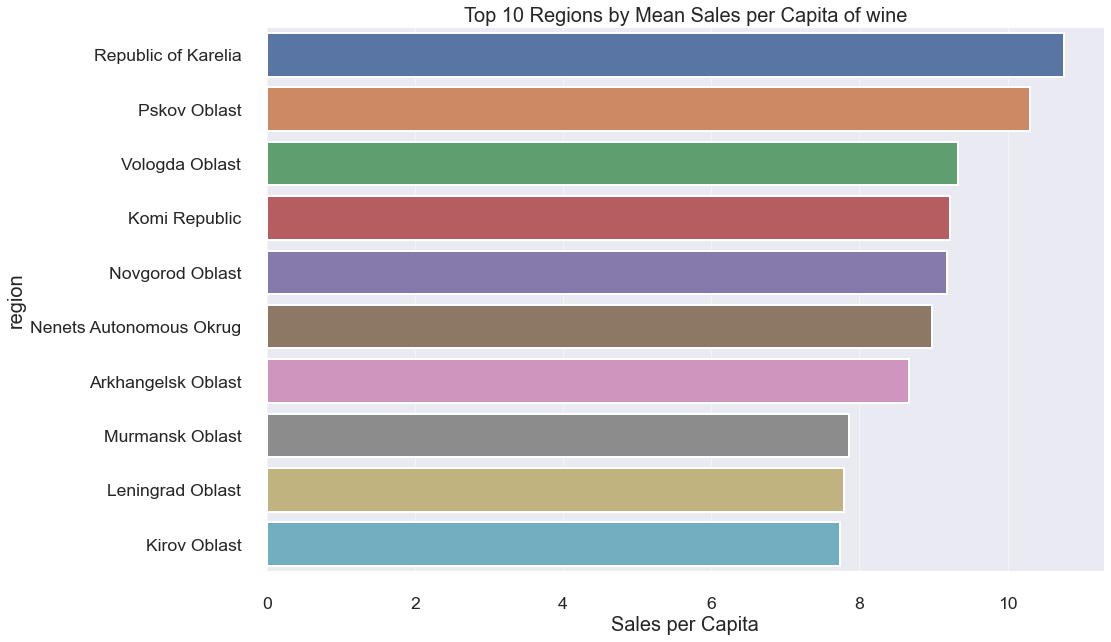

In [48]:
funcs.cat_plots(df_melt_reg, plot_type = 'barplot', n =10, beverage = 'wine')

Looking at location sales, Saint Pertersgburg tops the list followed by Moscow and Yamalo-Nenets Autonomous Okrug in third. As observed in the time series plot, beer has the most sales by region.

The boxplot shows the distribution of sales per beverage. There are three regions in beer sales that are outliers outliers while you can observe 2 outlier regions in wine sales. 

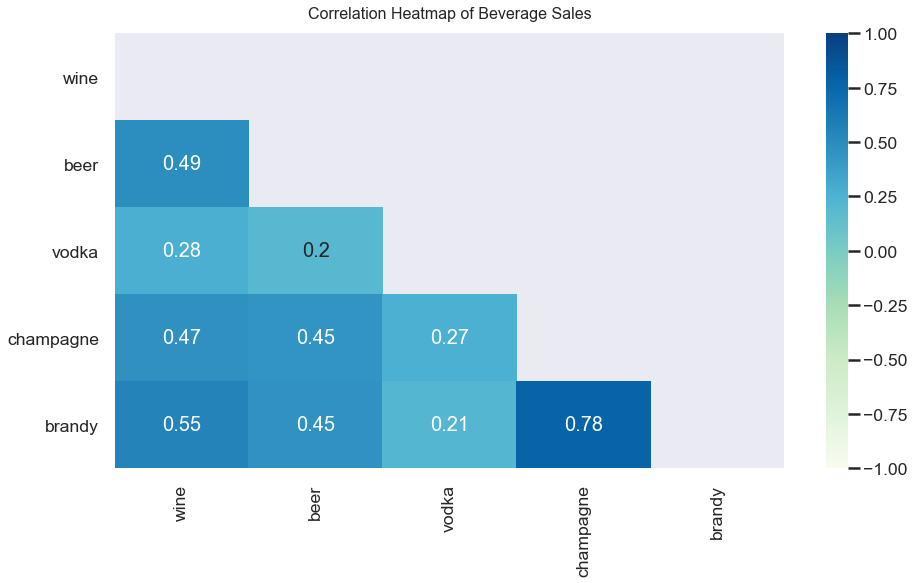

In [21]:
funcs.corr_heatmap(df_clean)

The correlation heatmap shows a strong positive relationship between brandy and champagne sales. This signifies that for every increase in one variable, there's a corresponding increase in sales of the other variable. We can also observe positive relationship between wine and brandy sales, even though not as strong as relationship between champagne and brandy.

## Machine Learning

This section will aim to solve the main ask of this project. We will use **Collaborative Filtering Method**, an unsupervised machine learning algorithm to recommend regions similar to wine sales in Saint Petersburg. 

**Collaborative Filtering Method** is one of three major methods to build a Recommender System. This method uses a similarity score to recommend items based on user interactions (Source: [Recommendation System for Streaming Platforms](https://www.datacamp.com/community/tutorials/streaming-platform-analysis)). 

The following steps will be implemented:

- Import machine learning modules
- Preprocess data for machine learning
- Compute similarity score using cosine similarity

We will create functions to preprocess the data and compute similarity scores.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

### Preprocessing

We will scale numerical features using MinMaxScaler to have numerical values between 0 and 1. Year column will be converted to object data type

In [23]:
df_grp, cols_of_df, df_nums, df_num_cols, cos_sim = funcs.preprocess_data(df_clean)

In [42]:
top_n = funcs.recommend_regions(df_grp, 'Saint Petersburg', 10, cos_sim)
top_n

47                       Republic of Adygea
50                       Republic of Crimea
66                               Sevastopol
68                           Stavropol Krai
34                            Moscow Oblast
82           Yamalo-Nenets Autonomous Okrug
64                            Samara Oblast
65                           Saratov Oblast
21    Khanty–Mansi Autonomous Okrug – Yugra
14                Kabardino-Balkar Republic
Name: region, dtype: object

In [29]:
df_wine = df_clean.pivot(index='region', columns='year', values='wine').reset_index()

In [31]:
df_wine.columns.name = None

In [32]:
df_wine.head()

,region,1998-01-01 00:00:00,1999-01-01 00:00:00,2000-01-01 00:00:00,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00
0,Altai Krai,3.3,2.2,2.1,2.3,1.6,1.7,2.0,2.0,2.2,2.5,3.5,3.8,4.1,4.51,4.8,4.4,4.1,4.4,4.8
1,Altai Republic,3.4,4.8,5.4,5.7,5.7,6.4,6.7,6.0,4.0,4.8,6.0,5.5,6.1,5.71,5.2,4.2,4.2,4.3,4.5
2,Amur Oblast,2.1,2.9,2.4,2.6,2.3,5.3,5.2,5.8,5.9,5.7,6.5,6.9,7.6,7.21,5.8,6.7,6.1,6.0,6.2
3,Arkhangelsk Oblast,4.3,4.6,5.5,7.0,8.1,9.2,7.0,7.6,8.6,10.1,10.7,11.3,12.0,12.23,9.2,9.2,10.7,9.0,8.4
4,Astrakhan Oblast,2.9,3.8,3.7,3.8,4.1,4.5,4.8,4.2,3.9,4.1,5.0,5.9,6.1,4.92,4.7,4.2,5.1,4.7,4.5


In [34]:
df_nums = df_wine.iloc[:, 1:]

In [36]:
test_scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled = test_scaler.fit_transform(df_nums)

In [37]:
test_cos_sim = cosine_similarity(df_scaled, df_scaled)

In [46]:
indices = pd.Series(df_wine.index, index = df_wine['region'])
indices = indices.drop_duplicates()
# get index corresponding to region
idx = indices['Saint Petersburg']
# get pairwise similarity scores
sig_scores = list(enumerate(test_cos_sim[idx]))
# sort the regions
sig_scores = sorted(sig_scores, key = lambda x: x[1], reverse = True)
# scores of n most similar regions
sig_scores = sig_scores[1:11]
# region indices
region_indices = [i[0] for i in sig_scores]
# get n most similar regions
test_top_n = df_grp['region'].iloc[region_indices]

In [47]:
test_top_n

67             Smolensk Oblast
62    Sakha (Yakutia) Republic
36     Nenets Autonomous Okrug
69           Sverdlovsk Oblast
74                 Tver Oblast
3           Arkhangelsk Oblast
37      Nizhny Novgorod Oblast
29            Leningrad Oblast
44                   Perm Krai
65              Saratov Oblast
Name: region, dtype: object